In [6]:
# Import necessary libraries
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# 1. Métodos Regula-Falsi y Secante

Implementa el método Regula-Falsi tal que, dado un intervalo $[a, b]$ donde $f(a)f(b) < 0$, encuentra una raiz $p \in [a, b]$:

In [37]:
def regula_falsi(f, a, b, x):
    
    # Inicializar la variable
    p = a
    tol = 0.001
    
    if f.subs(x, a) * f.subs(x, b) >= 0:
        print("No se puede calcular en el intervalo [{}, {}]".format(a, b))
        return None
    
    while abs(f.subs(x, p)) > tol:
        p = a - ((f.subs(x, a) * (b - a)) / (f.subs(x, b) - f.subs(x, a)))
        if f.subs(x, p) * f.subs(x, b) < 0:
            b = p
        else:
            a = p
    
    print("RF: La raiz de f = {} es {} con valor f({})={}".format(f, p, p, f.subs(x, p)))
    return p

Implementa el método de la Secante, tal que dados dos números iniciales $p_0$ and $p_1$, devuelve una raiz $p$:

In [30]:
def secant(f, p_0, p_1, x):
    
    # Inicializar variable
    p_n = p_0
    tol = 0.001
    
    if f.subs(x, p_0) * f.subs(x, p_1) >= 0:
        print("No se puede clacular en el intervalo [{}, {}]".format(p_0, p_1))
        return None
    
    while f.subs(x, p_n) > tol:
        p_n = p_1 - ((f.subs(x, p_1) * (p_0 - p_1)) / (f.subs(x, p_0) - f.subs(x, p_1)))
        p_0 = p_1
        p_1 = p_n
    
    print("S: La raiz de f = {} es {} con valor f({})={}".format(f, p_n, p_n, f.subs(x, p_n)))
    return p_n

# 2. Convergencia del método de la secante

### Nociones básicas de simpy

Representar una función

In [8]:
x = sp.Symbol('x') # Guardar x como símbolo
f = x**2*sp.sin(x) # introducir la funcion dependiente de x f(x)
sp.diff(f,x) # derivada de f(x)

x**2*cos(x) + 2*x*sin(x)

In [9]:
I = sp.Interval(-1/4,1/4)
I

Interval(-0.250000000000000, 0.250000000000000)

Programa una función la cual es capaz de, dada una función $f(x)$ con una raiz $p \in [p_0-\delta, p_0+\delta]$ si el método de la secante es capaz de encontrar $p$.

**Nota**: 

* Puedes calcular la derivada de una función $f$ utilizando la librería simpy.

* Puedes ver un [ejemplo detallado en la documentación de simpy](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html).

* Puedes ver si una función $f$ es continua en un dominio mediante la función [`continuous_domain`](https://docs.sympy.org/latest/modules/calculus/index.html#sympy.calculus.util.continuous_domain) de simpy: `continuous_domain` devuelve el intervalo (si es continuo en todo el intervalo) o la unión de intervalos en las que es continua.

In [35]:
from sympy.calculus.util import continuous_domain
def convergence_secant(f, p_0, delta, x):
    f_der = sp.diff(f, x)
    interval = sp.Interval(p_0 - delta, p_0 + delta)
    der_2_interval = continuous_domain(sp.diff(f_der, x), x, interval)
    
    if der_2_interval == interval and f.subs(x, p_0) == 0 and f_der.subs(x, p) != 0:
        return secant(f, p_0 - delta, p_0 + delta, x)
    else:
        return regula_falsi(f, p_0 - delta, p_0 + delta, x)

In [36]:
f1 = 2.3 * x**5 + 2.3 * x**4 + 3.2 * x + 3.2
print(convergence_secant(f1, 0, 5, x))

RF: La raiz de f = 2.3*x**5 + 2.3*x**4 + 3.2*x + 3.2 es -1.00000000000000 con valor f(-1.00000000000000)=0
-1.00000000000000


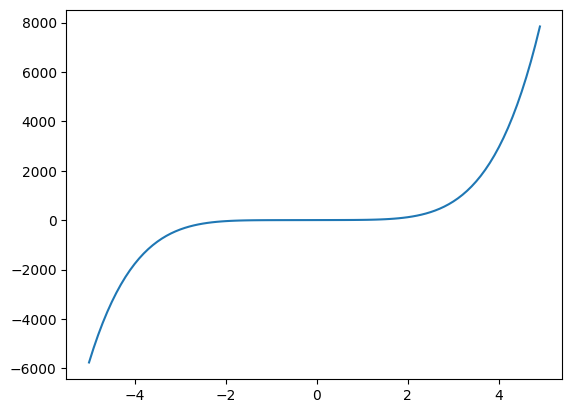

In [14]:
x_array = np.arange(-5, 5, 0.1)
plt.plot(x_array, 2.3 * x_array**5 + 2.3 * x_array**4 + 3.2 * x_array + 3.2)

# 3. Método más eficiente

Programa una función que, dada una función $f$ con una raiz $p$ cerca de un valor $p_0$, encuentra una raiz de "la forma más eficiente" (vista hasta ahora). Esto es:

1. Comprueba si el método de la secante garantizaría la convergencia a $p$ dadas dos estimaciones $p_0$ y $p_1$.
2. Si es así, aplica el método de la secante para encontrar $p$.
3. Si la convergencia no está garantizada, encuentra un intervalo $[a, b]$ cerca de $p_0$ donde haya un cambio de signo. 
4. Utiliza el método Regula-Falsi para encontrar la raiz $p$ en $[a, b]$. 

In [38]:
def find_root_efficiently(f, p_0, p_1, x):
    f_der = sp.diff(f, x)
    interval = sp.Interval(p_0, p_1)
    der_2_interval = continuous_domain(sp.diff(f_der, x), x, interval)
    
    # paso 1
    if der_2_interval == interval and (f.subs(x, p_0) == 0 or f.subs(x, p_1) == 0) and (f_der.subs(x, p_0) != 0 or f_der.subs(x, p_1) != 0):
        # paso 2
        return secant(f, p_0, p_1, x)
    else:
        # paso 3
        d = (p_1 - p_0) / 2
        while f.subs(p_0 - d) * f.subs(p_0 + d) >= 0:
            d -= 0.001
        # paso 4
        return regula_falsi(f, p_0 - d, p_0 + d, x)
    

Utiliza la función anterior para encontrar una raíz de las siguientes funciones:

**Lista de funciones**:

1. $f_1(x)=2.3 x^5 + 2.3 x^4 + 3.2 x + 3.2$
2. $f_4(x)=e^{-x} - \ln x$, for $x > 0$
3. $f_5(x)=\ln x + x$, for $x > 0$
4. $f_8(x)=\ln x + \sqrt{x}$, for $x > 0$
5. $f_7(x)=(x-1)^2 - \sqrt{x}$, for $x > 0$
6. $f_9(x)=e^x - \sin x$, for $x > 0$